In [34]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
#psi4.core.set_output_file('output.dat', False)
import time


In [35]:
# setup basic arguments for qed-ci calculation

# z-matrix for LIH
mol_str = """
Li
H 1 1.8
symmetry c1
"""

# options for Psi4
options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

# options for the PFHamiltonian Generator class - include cavity effects
cavity_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.05]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 1, #<== this is a minimal photon basis, should explore increasing this 
}

# options for PFHamiltonian Generator class - exclude cavity effects
cavity_free_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 0, 
}



In [36]:
# template for the z-matrix so we can scan through bond lengths
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""


# number of bondlengths in the scan
N_R = 50

# number of electronic states to save
N_el = 10

r_array = np.linspace(1.0, 4.0, N_R)

# array for energies for LiH outside cavity
cavity_free_E_array = np.zeros((N_R, N_el))

# array  for energies inside the cavity
cavity_E_array = np.zeros((N_R, N_el))

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(mol_str)
    print(mol_str)
    
    # call psi4 RHF
    scf_e, wfn = psi4.energy('SCF/sto-3g', return_wfn=True)
    
    # call psi4 FCI
    fci_energy = psi4.energy('fci/sto-3g',ref_wfn=wfn)
    
    # LiH no cavity
    LiH = PFHamiltonianGenerator(mol_str, options_dict, cavity_free_dict)

    # check to make sure PFHamiltonian cavity-free FCI ground-state agrees with psi4
    assert np.isclose(LiH.CIeigs[0], fci_energy)
    
    # LiH with cavity
    LiH_cav = PFHamiltonianGenerator(mol_str, options_dict, cavity_dict)
    cavity_free_E_array[r_idx,:] = LiH.CIeigs[:N_el]
    cavity_E_array[r_idx,:] = LiH_cav.CIeigs[:N_el]
    r_idx += 1





Li
H 1 1.0
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:30 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ------------------------------------

	user time   =       0.06 seconds =       0.00 minutes
	system time =       0.00 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =      89.82 seconds =       1.50 minutes
	system time =       3.05 seconds =       0.05 minutes
	total time  =      80391 seconds =    1339.85 minutes
SCF Iteration   1: Energy = -7.7673621359865361   dE = -7.76736E+00   dRMS = 2.13934E-15
SCF Iteration   2: Energy = -7.7673621359865486   dE = -1.24345E-14   dRMS = 1.19441E-15
Total time for SCF iterations: 0.001 seconds 

QED-RHF   energy: -7.76736214 hartree
Psi4  SCF energy: -7.76736214 hartree
 Completed QED-RHF in 0.08402204513549805 seconds
   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 

 C

 Completed Hamiltonian build in 0.7033960819244385 seconds

Li
H 1 1.0612244897959184
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:31 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.3698916242E-01.
  Reciprocal condition number of the overlap matrix is 1.2837061490E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.729856014251709 seconds

Li
H 1 1.1224489795918366
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:33 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.49736945118345   -7.49737e+00   0.00000e+00 
   @RHF iter   1:    -7.80576385283984   -3.08394e-01   1.49964e-02 ADIIS/DIIS
   @RHF iter   2:    -7.81563905986873   -9.87521e-03   1.54286e-03 ADIIS/DIIS
   @RHF iter   3:    -7.81583357044598   -1.94511e-04   4.59147e-04 ADIIS/DIIS
   @RHF iter   4:    -7.81587311132068   -3.95409e-05   8.35371e-05 DIIS
   @RHF iter   5:    -7.81587437127288   -1.25995e-06   9.97402e-07 DIIS
   @RHF iter   6:    -7.81587437145933   -1.86452e-10   5.47071e-09 DIIS
   @RHF iter   7:    -7.81587437145934   -7.99361e-15   3.54305e-09 DIIS
   @RHF it

 Completed Hamiltonian build in 0.7257611751556396 seconds

Li
H 1 1.183673469387755
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:35 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.5315078921E-01.
  Reciprocal condition number of the overlap matrix is 1.3964372455E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7066230773925781 seconds

Li
H 1 1.2448979591836735
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:37 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.48071165515378   -7.48071e+00   0.00000e+00 
   @RHF iter   1:    -7.83193912512833   -3.51227e-01   1.62115e-02 ADIIS/DIIS
   @RHF iter   2:    -7.84377416787839   -1.18350e-02   1.69841e-03 ADIIS/DIIS
   @RHF iter   3:    -7.84401753701147   -2.43369e-04   5.00805e-04 ADIIS/DIIS
   @RHF iter   4:    -7.84406557178777   -4.80348e-05   4.29717e-05 DIIS
   @RHF iter   5:    -7.84406585903207   -2.87244e-07   1.33903e-06 DIIS
   @RHF iter   6:    -7.84406585924575   -2.13679e-10   9.60216e-09 DIIS
   @RHF iter   7:    -7.84406585924575    0.00000e+00   9.00381e-10 DIIS
   @RHF it

 Completed Hamiltonian build in 0.7065098285675049 seconds

Li
H 1 1.306122448979592
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:38 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.7490433708E-01.
  Reciprocal condition number of the overlap matrix is 1.5465886635E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.690079927444458 seconds

Li
H 1 1.3673469387755102
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:40 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 2.8778387147E-01.
  Reciprocal condition number of the overlap matrix is 1.6360959078E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7020187377929688 seconds

Li
H 1 1.4285714285714286
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:42 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.0188292721E-01.
  Reciprocal condition number of the overlap matrix is 1.7350680400E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.704125165939331 seconds

Li
H 1 1.489795918367347
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:44 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.45785916883348   -7.45786e+00   0.00000e+00 
   @RHF iter   1:    -7.84710394363014   -3.89245e-01   1.80582e-02 ADIIS/DIIS
   @RHF iter   2:    -7.86291522404725   -1.58113e-02   1.83386e-03 ADIIS/DIIS
   @RHF iter   3:    -7.86322650134142   -3.11277e-04   5.59016e-04 ADIIS/DIIS
   @RHF iter   4:    -7.86328851163967   -6.20103e-05   2.65831e-05 DIIS
   @RHF iter   5:    -7.86328860502525   -9.33856e-08   1.18479e-06 DIIS
   @RHF iter   6:    -7.86328860516190   -1.36643e-10   1.91236e-08 DIIS
   @RHF iter   7:    -7.86328860516191   -8.88178e-15   1.54784e-09 DIIS
   @RHF it

 Completed Hamiltonian build in 0.7013828754425049 seconds

Li
H 1 1.5510204081632653
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:45 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.45348656157418   -7.45349e+00   0.00000e+00 
   @RHF iter   1:    -7.84576395600319   -3.92277e-01   1.84487e-02 ADIIS/DIIS
   @RHF iter   2:    -7.86267273433951   -1.69088e-02   1.82981e-03 ADIIS/DIIS
   @RHF iter   3:    -7.86299349257637   -3.20758e-04   5.71528e-04 ADIIS/DIIS
   @RHF iter   4:    -7.86305909080637   -6.55982e-05   3.71699e-05 DIIS
   @RHF iter   5:    -7.86305927867301   -1.87867e-07   1.69562e-06 DIIS
   @RHF iter   6:    -7.86305927899011   -3.17095e-10   2.64029e-08 DIIS
   @RHF iter   7:    -7.86305927899013   -2.30926e-14   2.04410e-09 DIIS
   @RHF it

 Completed Hamiltonian build in 0.7185268402099609 seconds

Li
H 1 1.6122448979591837
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:47 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.5030887837E-01.
  Reciprocal condition number of the overlap matrix is 2.0854410483E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7115850448608398 seconds

Li
H 1 1.6734693877551021
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:49 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.6805284821E-01.
  Reciprocal condition number of the overlap matrix is 2.2185090392E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7100932598114014 seconds

Li
H 1 1.7346938775510203
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:51 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 3.8636949119E-01.
  Reciprocal condition number of the overlap matrix is 2.3587824241E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7137038707733154 seconds

Li
H 1 1.7959183673469388
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:52 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.0512326189E-01.
  Reciprocal condition number of the overlap matrix is 2.5056244482E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.6997230052947998 seconds

Li
H 1 1.8571428571428572
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:54 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.2418233293E-01.
  Reciprocal condition number of the overlap matrix is 2.6583551202E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.750173807144165 seconds

Li
H 1 1.9183673469387754
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:56 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Primary Basis <==

  Basis Set: STO-3G
    Blend: STO-3G
    Number of shells: 4
    Number of basis functions: 6
    Number of Cartesian functions: 6
    Spherical Harmonics?: true
    Max angular momentum: 1

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:  

 Completed Hamiltonian build in 0.7047569751739502 seconds

Li
H 1 1.9795918367346939
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:58 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.6271467656E-01.
  Reciprocal condition number of the overlap matrix is 2.9785635888E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7116601467132568 seconds

Li
H 1 2.0408163265306123
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:51:59 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 4.8195207097E-01.
  Reciprocal condition number of the overlap matrix is 3.1444873776E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.712857723236084 seconds

Li
H 1 2.1020408163265305
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:01 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 5.0102375062E-01.
  Reciprocal condition number of the overlap matrix is 3.3131934052E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.698087215423584 seconds

Li
H 1 2.163265306122449
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:03 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 5.1982799254E-01.
  Reciprocal condition number of the overlap matrix is 3.4838128971E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7076563835144043 seconds

Li
H 1 2.2244897959183674
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:05 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      


  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.42278177247007   -7.42278e+00   0.00000e+00 
   @RHF iter   1:    -7.76887865718758   -3.46097e-01   2.27701e-02 ADIIS/DIIS
   @RHF iter   2:    -7.80467320342978   -3.57945e-02   1.46015e-03 ADIIS/DIIS
   @RHF iter   3:    -7.80492819459008   -2.54991e-04   6.77594e-04 ADIIS/DIIS
   @RHF iter   4:    -7.80503013626469   -1.01942e-04   2.12929e-04 ADIIS/DIIS
   @RHF iter   5:    -7.80503976127323   -9.62501e-06   2.96344e-06 DIIS
   @RHF iter   6:    -7.80503976341256   -2.13932e-09   6.65267e-08 DIIS
   @RHF iter   7:    -7.80503976341308   -5.29354e-13   6.08746e-09 DIIS
   

 Completed Hamiltonian build in 0.7187678813934326 seconds

Li
H 1 2.2857142857142856
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:07 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 5.5625879163E-01.
  Reciprocal condition number of the overlap matrix is 3.8271335710E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7037088871002197 seconds

Li
H 1 2.3469387755102042
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:08 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.41963024540359   -7.41963e+00   0.00000e+00 
   @RHF iter   1:    -7.74836067946087   -3.28730e-01   2.36606e-02 ADIIS/DIIS
   @RHF iter   2:    -7.78954528642724   -4.11846e-02   2.01055e-03 ADIIS/DIIS
   @RHF iter   3:    -7.78987850071967   -3.33214e-04   6.75088e-04 ADIIS/DIIS
   @RHF iter   4:    -7.78997935079098   -1.00850e-04   2.45111e-04 ADIIS/DIIS
   @RHF iter   5:    -7.78999266691395   -1.33161e-05   8.73213e-06 DIIS
   @RHF iter   6:    -7.78999268562040   -1.87064e-08   1.79939e-07 DIIS
   @RHF iter   7:    -7.78999268562489   -4.49241e-12   2.45195e-08 DIIS
   @

 Completed Hamiltonian build in 0.6979978084564209 seconds

Li
H 1 2.4081632653061225
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:10 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 5.9055145529E-01.
  Reciprocal condition number of the overlap matrix is 4.1667600945E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7086207866668701 seconds

Li
H 1 2.4693877551020407
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:12 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

   @RHF iter   3:    -7.77459452248762   -5.98304e-04   6.51974e-04 ADIIS/DIIS
   @RHF iter   4:    -7.77468642369599   -9.19012e-05   2.74407e-04 ADIIS/DIIS
   @RHF iter   5:    -7.77470376868808   -1.73450e-05   1.88383e-05 DIIS
   @RHF iter   6:    -7.77470385534105   -8.66530e-08   3.16386e-07 DIIS
   @RHF iter   7:    -7.77470385535627   -1.52243e-11   4.44787e-08 DIIS
   @RHF iter   8:    -7.77470385535655   -2.77112e-13   7.46099e-10 DIIS
   @RHF iter   9:    -7.77470385535654    7.10543e-15   1.18567e-12 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A     -2.375530     2A     -0.211554  

    Virtual:                                                              

       3A      0.065829     4A      0.156799     5A      0.156799  
       6A      0.320888  

    Final Occupation by Irrep:
              A 
    DOCC [    

 Completed Hamiltonian build in 0.7173779010772705 seconds

Li
H 1 2.5306122448979593
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:14 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.2209495964E-01.
  Reciprocal condition number of the overlap matrix is 4.4944143734E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7177670001983643 seconds

Li
H 1 2.5918367346938775
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:15 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.3666445889E-01.
  Reciprocal condition number of the overlap matrix is 4.6510242151E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7098937034606934 seconds

Li
H 1 2.6530612244897958
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:17 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.5035043709E-01.
  Reciprocal condition number of the overlap matrix is 4.8013330128E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7124340534210205 seconds

Li
H 1 2.7142857142857144
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:19 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.6309904911E-01.
  Reciprocal condition number of the overlap matrix is 4.9442398821E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7050807476043701 seconds

Li
H 1 2.7755102040816326
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:21 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.7486531647E-01.
  Reciprocal condition number of the overlap matrix is 5.0787036413E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7059240341186523 seconds

Li
H 1 2.836734693877551
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:22 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.8561654900E-01.
  Reciprocal condition number of the overlap matrix is 5.2037992049E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7115340232849121 seconds

Li
H 1 2.8979591836734695
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:24 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 6.9533634046E-01.
  Reciprocal condition number of the overlap matrix is 5.3187851207E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7074737548828125 seconds

Li
H 1 2.9591836734693877
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:26 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.41067393000855   -7.41067e+00   0.00000e+00 
   @RHF iter   1:    -7.63320911275925   -2.22535e-01   2.71486e-02 ADIIS/DIIS
   @RHF iter   2:    -7.70297769314126   -6.97686e-02   1.27044e-02 ADIIS/DIIS
   @RHF iter   3:    -7.71539854505827   -1.24209e-02   6.54181e-04 ADIIS/DIIS
   @RHF iter   4:    -7.71542808679706   -2.95417e-05   3.62916e-05 DIIS
   @RHF iter   5:    -7.71542818643015   -9.96331e-08   1.07746e-05 DIIS
   @RHF iter   6:    -7.71542821348197   -2.70518e-08   1.67382e-06 DIIS
   @RHF iter   7:    -7.71542821374713   -2.65159e-10   1.50662e-07 DIIS
   @RHF it

 Completed Hamiltonian build in 0.6987419128417969 seconds

Li
H 1 3.020408163265306
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:28 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.1171821432E-01.
  Reciprocal condition number of the overlap matrix is 5.5167741349E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7146050930023193 seconds

Li
H 1 3.0816326530612246
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:29 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.1845403574E-01.
  Reciprocal condition number of the overlap matrix is 5.5997328606E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.6864571571350098 seconds

Li
H 1 3.142857142857143
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:31 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.2430260701E-01.
  Reciprocal condition number of the overlap matrix is 5.6724940596E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7071459293365479 seconds

Li
H 1 3.204081632653061
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:33 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.2934438621E-01.
  Reciprocal condition number of the overlap matrix is 5.7357514041E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7014658451080322 seconds

Li
H 1 3.2653061224489797
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:35 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A          6       6 
   -------------------------
    Total       6       6
   -------------------------

  ==> Iterations <==

                        Total Energy        Delta E     RMS |[F,P]|

   @RHF iter SAD:    -7.40881123840723   -7.40881e+00   0.00000e+00 
   @RHF iter   1:    -7.57434999921162   -1.65539e-01   2.69133e-02 ADIIS/DIIS
   @RHF iter   2:    -7.60788649283784   -3.35365e-02   2.61395e-02 ADIIS/DIIS
   @RHF iter   3:    -7.68210143517984   -7.42149e-02   2.75804e-03 ADIIS/DIIS
   @RHF iter   4:    -7.68271567083032   -6.14236e-04   1.01363e-03 ADIIS/DIIS
   @RHF iter   5:    -7.68285598308297   -1.40312e-04   1.22323e-04 ADIIS/DIIS
   @RHF iter   6:    -7.68285993340372   -3.95032e-06   1.26992e-05 DIIS
   @RHF iter   7:    -7.68285995179157   -1.83878e-08   1.37237e-06 DII

 Completed Hamiltonian build in 0.701956033706665 seconds

Li
H 1 3.326530612244898
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:36 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.3735906293E-01.
  Reciprocal condition number of the overlap matrix is 5.8372762259E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7097430229187012 seconds

Li
H 1 3.387755102040816
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:38 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.4050545291E-01.
  Reciprocal condition number of the overlap matrix is 5.8774343935E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7166609764099121 seconds

Li
H 1 3.4489795918367347
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:40 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.4318403440E-01.
  Reciprocal condition number of the overlap matrix is 5.9117433529E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7315521240234375 seconds

Li
H 1 3.510204081632653
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:42 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.4546410852E-01.
  Reciprocal condition number of the overlap matrix is 5.9410291214E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7184991836547852 seconds

Li
H 1 3.571428571428571
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:44 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.4740599044E-01.
  Reciprocal condition number of the overlap matrix is 5.9660249358E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7085278034210205 seconds

Li
H 1 3.63265306122449
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:45 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.4906137512E-01.
  Reciprocal condition number of the overlap matrix is 5.9873686368E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7073450088500977 seconds

Li
H 1 3.693877551020408
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:47 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.5047412758E-01.
  Reciprocal condition number of the overlap matrix is 6.0056075905E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7164590358734131 seconds

Li
H 1 3.7551020408163263
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:49 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.5168124687E-01.
  Reciprocal condition number of the overlap matrix is 6.0212074827E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7106978893280029 seconds

Li
H 1 3.816326530612245
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:51 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.5271384787E-01.
  Reciprocal condition number of the overlap matrix is 6.0345625368E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7013339996337891 seconds

Li
H 1 3.877551020408163
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:53 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                       

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.5359807571E-01.
  Reciprocal condition number of the overlap matrix is 6.0460057006E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.7000241279602051 seconds

Li
H 1 3.9387755102040813
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:54 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                      

  ==> Integral Setup <==

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.5435591500E-01.
  Reciprocal condition number of the overlap matrix is 6.0558180399E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==


 Completed Hamiltonian build in 0.6988210678100586 seconds

Li
H 1 4.0
symmetry c1


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:52:56 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,   

  Using in-core PK algorithm.
   Calculation information:
      Number of atoms:                   2
      Number of AO shells:               4
      Number of primitives:             12
      Number of atomic orbitals:         6
      Number of basis functions:         6

      Integral cutoff                 1.00e-12
      Number of threads:                 1

  Performing in-core PK
  Using 462 doubles for integral storage.
  We computed 55 shell quartets total.
  Whereas there are 55 unique shell quartets.

  ==> DiskJK: Disk-Based J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    Memory [MiB]:              375
    Schwarz Cutoff:          1E-12

    OpenMP threads:              1

  Minimum eigenvalue in the overlap matrix is 7.5500588372E-01.
  Reciprocal condition number of the overlap matrix is 6.0642370193E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superpositio

 Completed Hamiltonian build in 0.7138118743896484 seconds


In [37]:
# z-matrix for LIH
mol_str = """
Li
H 1 1.8
symmetry c1
"""

# options dictionary for the psi4 calculation
options_dict0 = {'basis': 'sto-3g',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-8,
               'd_convergence' : 1e-7
               }

# let's run a psi4 geometry optimization to get the optimal geometry

# set the options
psi4.set_options(options_dict0)

# first set the coordinates in init_string as the molecule's geometry 
mol0 = psi4.geometry(mol_str)

# now capture the psi4 geometry data with the guess coordinates
init_geometry_string = psi4.core.Molecule.create_psi4_string_from_molecule(mol0)

# run the geometry optimization
psi4.optimize("HF")

guess_geometry = mol0.geometry()

guess_string = psi4.core.Molecule.create_psi4_string_from_molecule(mol0)


	Change in internal coordinate of 5.69e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.



Scratch directory: /tmp/
gradient() will perform analytic gradient computation.
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:53:12 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ------

	Change in internal coordinate of 5.46e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.


   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----

	----------------------------------------------------------------------------------------------
	  Convergence Criteria     1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o
	----------------------------------------------------------------------------------------------
	     4      -7.86338209   -2.94e-05      9.15e-05 *    9.15e-05 o    8.16e-04 *    8.16e-04 o  ~
	----------------------------------------------------------------------------------------------

Next Geometry in Ang 
	Fragment 1 (Ang)

	   Li   0.0000000000   0.0000000000  -0.1896004272
	    H   0.0000000000   0.0000000000   1.3211957834


    Final optimized geometry and variables:
    Molecular point group: c1
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

    LI      
    H             1    1.511228



In [38]:
# options dictionary for the psi4 calculation
options_dict = {'basis': 'sto-3g',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-8,
               'd_convergence' : 1e-7
               }

# set the options
psi4.set_options(options_dict)

# first set the coordinates in guess_string as the molecule's geometry 
mol = psi4.geometry(guess_string)

# now capture the psi4 geometry data with the guess coordinates
guess_geometry_string = psi4.core.Molecule.create_psi4_string_from_molecule(mol)

# run the geometry optimization
psi4.optimize("HF")

opt_geometry = mol.geometry()

# capture the psi4 geometry data from the optimization
opt_geometry_string = psi4.core.Molecule.create_psi4_string_from_molecule(mol)

# run excited-state calculations - get first 5 excited states
n_states = 1

# run psi4 TDSCF at same level of theory as geometry optimization
psi4_rhf_e, wfn = psi4.frequency("CAM-b3lyp/sto-3g", return_wfn=True, molecule=mol,maxiter=50)




Scratch directory: /tmp/
gradient() will perform analytic gradient computation.
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMYM0V4HTALT
*** at Thu Oct 12 13:53:13 2023

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    31 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 
    atoms 2 entry H          line    19 file /Users/ptolley1/miniforge3/envs/work/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ------


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.8 release

                         Git: Rev {} zzzzzzz 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier, R. M.

In [39]:
from matplotlib import pyplot as plt

## Calculation of the Huang-Rhys Factor
Huang Rhys factor can be calculated by both

$$ S = 1/2(\Delta x / x_0)^2 \tag{Turner}$$

from the mode anharmonicity paper

and 

$$ S = \frac{m\omega_{vib} \Delta x^2}{2 \hbar} \tag{Hsu}$$

from the polaritonic Huang-Rhys factor paper

In [40]:
# Constants and Variables
x_0 = wfn.frequency_analysis["Xtp0"].data[5]
k = wfn.frequency_analysis["k"].data[5] * 10 ** 2
min_S0_loc = np.argmin(cavity_free_E_array[:,0])
min_S1_loc = np.argmin(cavity_free_E_array[:,1])
delta_au = (r_array[min_S1_loc] - r_array[min_S0_loc]) * 1.8897
delta_m = (r_array[min_S1_loc] - r_array[min_S0_loc]) * 10 ** (-10)
mu_kg = (6.94 * 1.008 / (6.94 + 1.008)) * (10 ** (-3)) / (6.022 * 10 ** 23)
omega_vib = np.sqrt(k / mu_kg)
h_bar = (6.626 * 10 ** (-34)) / (2 * np.pi)

# Turner
S_Turner = 0.5 * (delta_au / x_0) ** 2

# Hsu
S_Hsu = mu_kg * omega_vib * delta_m ** 2 / (2 * h_bar)

print(S_Turner)
print(S_Hsu)

180.5394412437593
159.39380627795506


In [58]:
var = np.poly1d(cavity_free_E_array[:,0])
derivative = var.deriv()
second_derivative = derivative.deriv()
kappa = second_derivative(r_array[min_S0_loc])
D_e = cavity_free_E_array[49,0]
alpha = kappa / (2 * D_e)
print(alpha)

2808908558813.629


First plot the ground-state potential energy surfaces for LiH inside and outisde the cavity.  The effect of the cavity will raise the energy slightly.

In [54]:
print(cavity_free_E_array[49,0])

-7.784278178707321


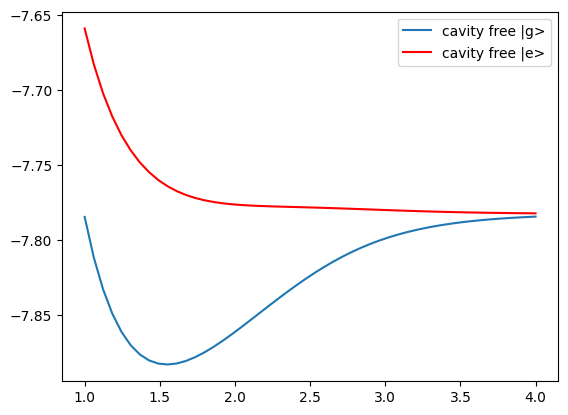

In [42]:
plt.plot(r_array, cavity_free_E_array[:,0], label='cavity free |g>')
plt.plot(r_array, cavity_free_E_array[:,1], 'r-', label='cavity free |e>')
#plt.plot(r_array, cavity_E_array[:,0], label='cavity |g,0>')
plt.legend()
plt.show()


Next plot the ground state surface shifted by the cavity energy and the first excited state surface of 
LiH outside the cavity along with the lower- and upper-polariton surfaces from LiH inside the cavity.
Note that lower polariton surface intersects with another surface for the molecule in the cavity (see the crossing of the red and green curves around r = 1.5 Angstroms); the polariton surface is smooth, so we should really re-sort the eigenvalues around this point. Ruby has some experience doing this. 

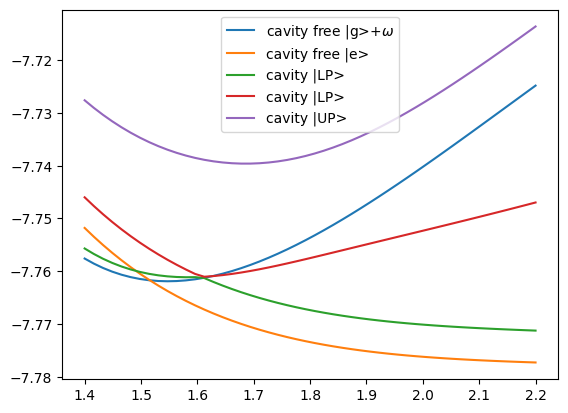

In [9]:
plt.plot(r_array, cavity_free_E_array[:,0]+0.12086, label='cavity free |g>+$\omega$')
plt.plot(r_array, cavity_free_E_array[:,1], label='cavity free |e>')
plt.plot(r_array, cavity_E_array[:,1], label='cavity |LP>')
plt.plot(r_array, cavity_E_array[:,2], label='cavity |LP>')
plt.plot(r_array, cavity_E_array[:,3], label='cavity |UP>')
plt.legend()
plt.show()